In [1]:
import numpy as np
from jaqs.data import DataView
from jaqs.research import SignalDigger
import warnings

warnings.filterwarnings("ignore")
dataview_folder = 'stockdata/hs300'
dv = DataView()
dv.load_dataview(dataview_folder)

/home/xinger/anaconda3/envs/IIA/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Dataview loaded successfully.


In [2]:
def mask_index_member():
    df_index_member = dv.get_ts('index_member')
    mask_index_member = ~(df_index_member >0) #定义信号过滤条件-非指数成分
    return mask_index_member

def limit_up_down():
    # 定义可买卖条件——未停牌、未涨跌停
    trade_status = dv.get_ts('trade_status')
    mask_sus = trade_status == u'停牌'
    # 涨停
    dv.add_formula('up_limit', '(close - Delay(close, 1)) / Delay(close, 1) > 0.095', is_quarterly=False)
    # 跌停
    dv.add_formula('down_limit', '(close - Delay(close, 1)) / Delay(close, 1) < -0.095', is_quarterly=False)
    can_enter = np.logical_and(dv.get_ts('up_limit') < 1, ~mask_sus) # 未涨停未停牌
    can_exit = np.logical_and(dv.get_ts('down_limit') < 1, ~mask_sus) # 未跌停未停牌
    return can_enter,can_exit

In [3]:
mask = mask_index_member()
can_enter,can_exit = limit_up_down()

In [4]:
from jaqs.research import SignalDigger
price = dv.get_ts('close_adj')
high = dv.get_ts('high_adj')
low = dv.get_ts('low_adj')

dv.add_formula("factor",'- Correlation(vwap_adj, volume, 10)',is_quarterly=False)
signal = dv.get_ts("factor")
signal

symbol,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000024.SZ,000027.SZ,000039.SZ,000046.SZ,000060.SZ,000061.SZ,...,601997.SH,601998.SH,603000.SH,603160.SH,603288.SH,603799.SH,603833.SH,603858.SH,603885.SH,603993.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20160104,-0.516941,-inf,-0.717011,-0.381988,NaN,-0.540330,-0.414171,-0.696174,-0.712166,-0.830877,...,NaN,-0.670815,-0.532163,NaN,-0.574892,-0.403839,NaN,NaN,0.100549,-0.398122
20160105,-0.288026,-inf,0.022007,-0.245200,NaN,-0.206120,-0.392205,-0.307085,-0.392649,-0.654043,...,NaN,-0.526281,-0.230478,NaN,0.180595,0.210184,NaN,NaN,0.294341,0.214205
20160106,-0.337502,-inf,0.074163,-0.364918,NaN,-0.287856,-0.512486,-0.415161,0.172436,-0.639272,...,NaN,-0.494766,-0.311435,NaN,0.579645,0.321342,NaN,NaN,0.361880,0.378866
20160107,-0.422917,-inf,-0.228013,-0.596544,NaN,-0.293643,-0.687983,-0.636234,-0.002605,-0.665710,...,NaN,-0.513661,-0.545025,NaN,-0.019905,-0.052134,NaN,NaN,-0.108086,0.278405
20160108,-0.122549,-inf,0.008911,-0.522839,NaN,0.057260,-0.566546,-0.296512,-0.002037,-0.403560,...,NaN,-0.146023,-0.424566,NaN,0.291232,0.173483,NaN,NaN,-0.165425,0.396511
20160111,-0.123909,-inf,0.046836,-0.252624,NaN,0.169746,-0.266968,-0.236009,-0.126985,-0.252708,...,NaN,0.036687,-0.327701,NaN,0.223531,0.113993,NaN,NaN,-0.225239,0.396688
20160112,0.093480,-inf,0.167202,-0.000721,NaN,0.213727,-0.081037,-0.170358,-0.125146,-0.084134,...,NaN,0.455391,-0.051741,NaN,0.346506,0.184267,NaN,NaN,-0.365341,0.388326
20160113,0.023315,-inf,0.162156,0.096979,NaN,-0.018215,-0.118826,0.047276,-0.271267,-0.035260,...,NaN,0.403090,0.034140,NaN,0.358452,0.364540,NaN,NaN,-0.232260,0.375353
20160114,0.125268,-inf,0.274438,0.213653,NaN,-0.167241,-0.158511,0.298245,-0.255570,-0.018695,...,NaN,0.207707,-0.077041,NaN,0.199134,0.245862,NaN,NaN,-0.021140,0.172303


In [5]:
sig = SignalDigger()
sig.process_signal_before_analysis(signal,
                                   price=price,
                                   high=high,
                                   low=low,
                                   n_quantiles=5,
                                   mask=mask,
                                   can_enter=can_enter,
                                   can_exit=can_exit,
                                   period=5,
                                   #benchmark_price=price_bench,
                                   forward=True,)
signal_data = sig.signal_data
signal_data.head()

Nan Data Count (should be zero) : 0;  Percentage of effective data: 68%


signal    return  upside_ret  downside_ret  quantile
trade_date symbol                                                           
20160105   000001.SZ -0.516941 -0.052554    0.013235     -0.067467         4
           000009.SZ -0.381988 -0.153397    0.044005     -0.181969         5
           000027.SZ -0.540330 -0.127784    0.027545     -0.148192         4
           000039.SZ -0.414171 -0.138405    0.024410     -0.156262         4
           000046.SZ -0.696174 -0.102327    0.035139     -0.148150         2



Value of signals of Different Quantiles Statistics
               min       max      mean       std  count    count %
quantile                                                          
1        -1.551344 -0.175181 -0.786087  0.115290  27826  20.139980
2        -0.937631  0.120716 -0.579996  0.151540  27638  20.003908
3        -0.884578  0.329349 -0.394440  0.189582  27621  19.991604
4        -0.822745  0.541333 -0.171786  0.220246  27638  20.003908
5        -0.673017  0.991329  0.229784  0.281663  27440  19.860599
Figure saved: /home/xinger/Desktop/quantOS/returns_report.pdf
Information Analysis
                 ic
IC Mean       0.062
IC Std.       0.122
t-stat(IC)   11.156
p-value(IC)   0.000
IC Skew      -0.122
IC Kurtosis   0.466
Ann. IR       0.508
Figure saved: /home/xinger/Desktop/quantOS/information_report.pdf


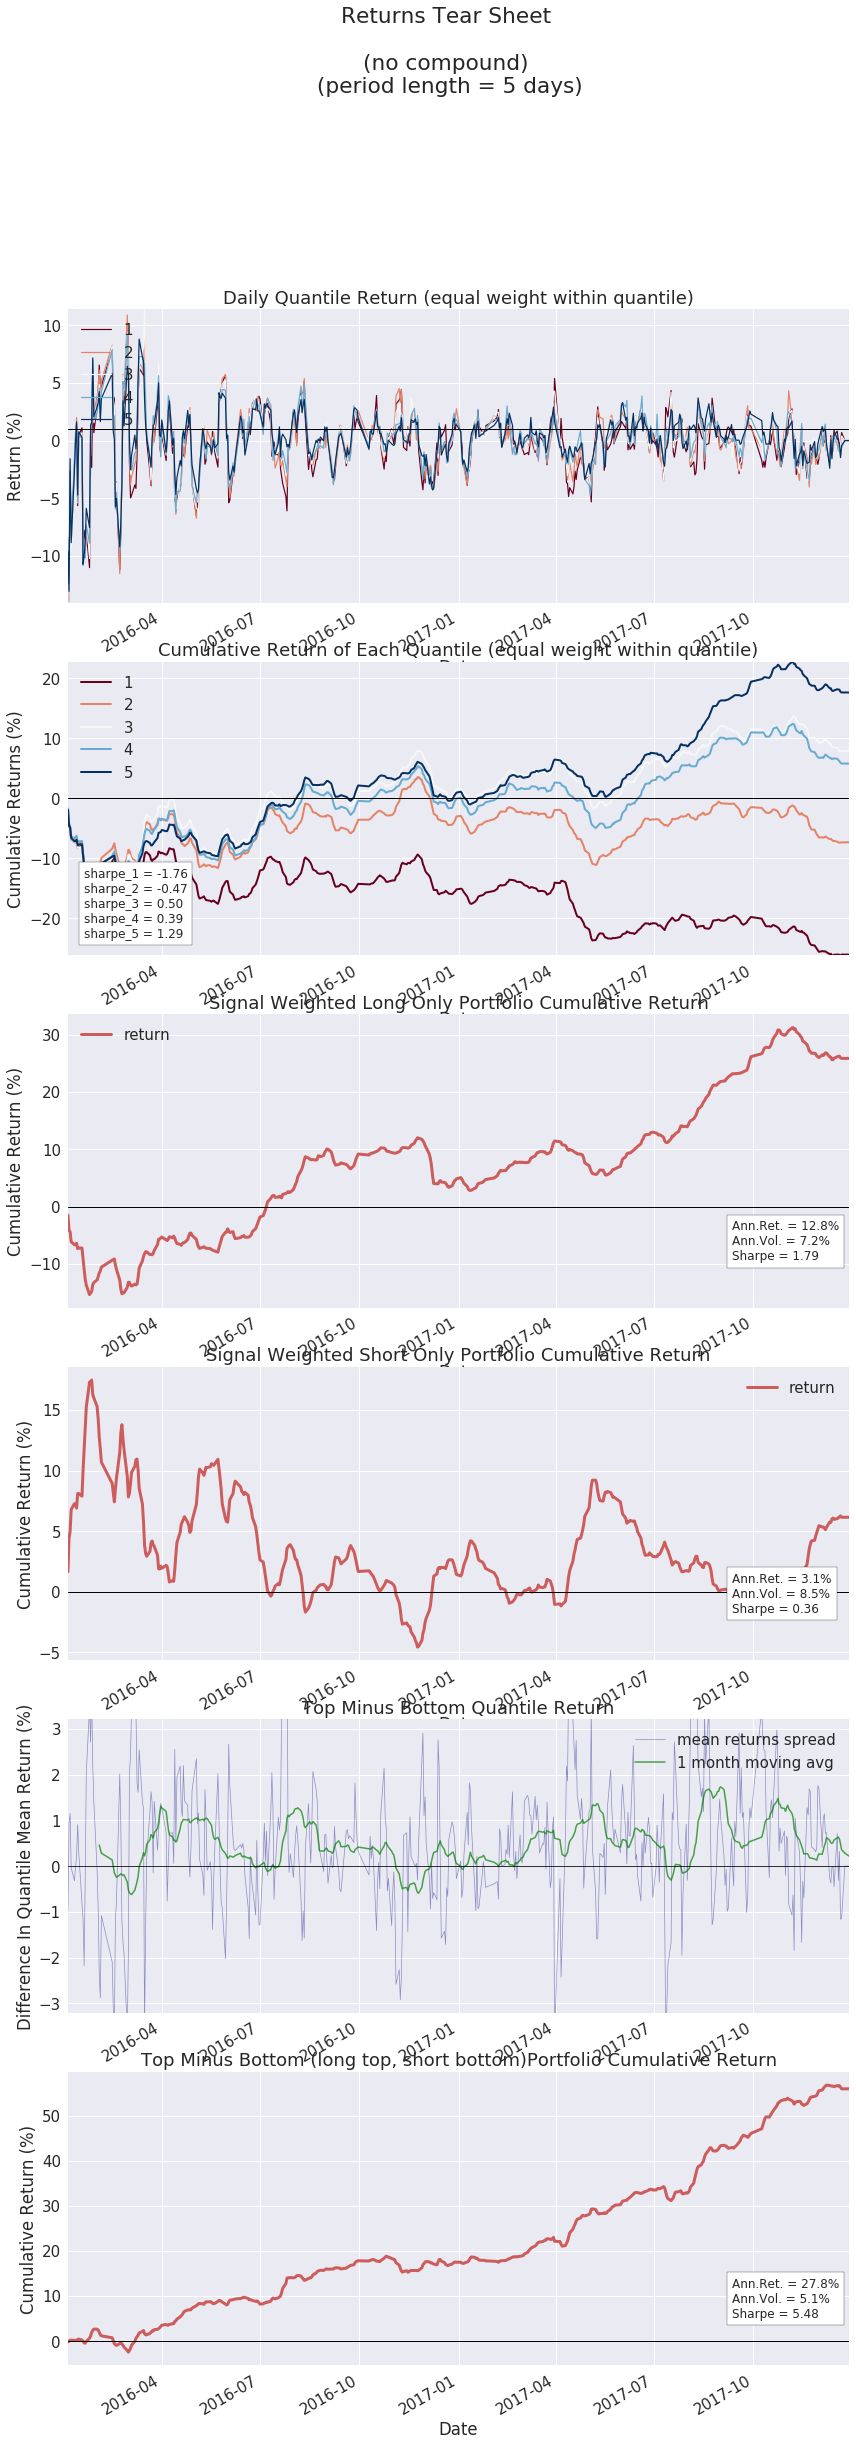

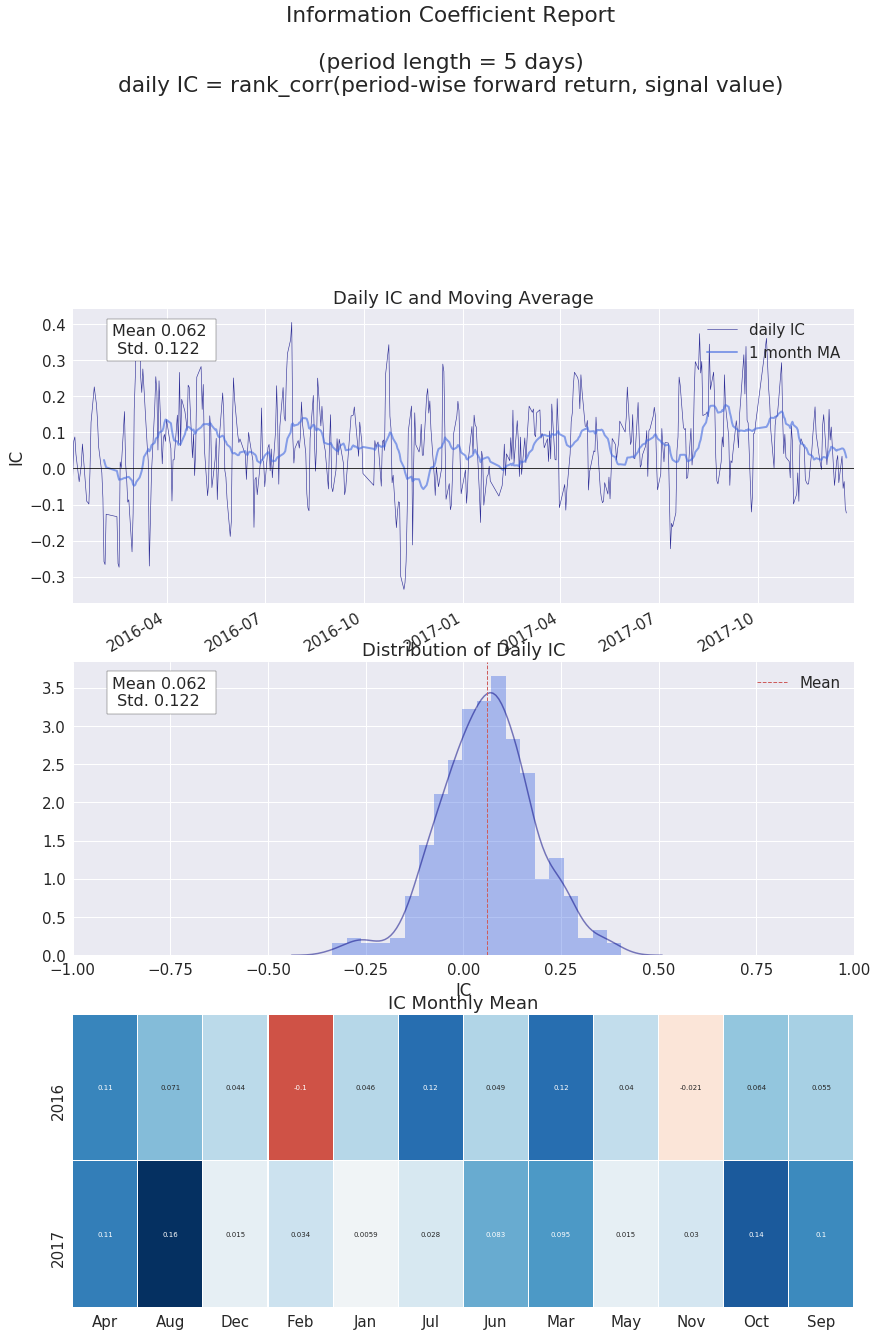

In [6]:
from matplotlib import pyplot as plt
sig.create_full_report()
plt.show()

In [7]:
# 因子分析
from jaqs.research import analysis
result = analysis(signal_data=signal_data,
                  is_event=False,
                  period=5)
print(result["ic"]) #如果是事件类的因子　没有ｉｃ分析
print(result["ret"])
print(result["space"])

                return_ic  upside_ret_ic  downside_ret_ic
IC Mean      6.173838e-02  -2.847306e-02     1.173066e-01
IC Std.      1.215014e-01   1.218426e-01     1.164837e-01
t-stat(IC)   1.115572e+01  -5.130484e+00     2.210960e+01
p-value(IC)  7.359027e-26   4.199535e-07     2.908254e-75
IC Skew     -1.220257e-01  -1.008406e-01    -1.242776e-01
IC Kurtosis  4.660898e-01   4.395996e-02    -1.257349e-01
Ann. IR      5.081292e-01  -2.336872e-01     1.007065e+00
             long_ret   short_ret  long_short_ret  top_quantile_ret  \
t-stat       2.430334    0.797546        1.825318          7.869585   
p-value      0.015450    0.425520        0.068570          0.000000   
skewness    -1.289239    0.598955        0.491824          0.018832   
kurtosis     6.047540    3.616433        4.085643          4.304219   
Ann. Ret     0.125384    0.045680        0.080415          0.094435   
Ann. Vol     0.163483    0.181494        0.139603          0.285721   
Ann. IR      0.766956    0.251687      